In [42]:
import os
import shutil

source_dir = "./test/" 
cats_folder = "./cats"
dogs_folder = "./dogs"  

for file_name in os.listdir(source_dir):

    file_path = os.path.join(source_dir, file_name)  

    if file_name.startswith("cat") and os.path.isfile(file_path):
        shutil.copy(file_path, cats_folder)
      
    elif file_name.startswith("dog") and os.path.isfile(file_path):
        shutil.copy(file_path, dogs_folder)
        

In [43]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [10]:
def load_images_from_folder(folder, label, target_size=(128, 128)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = load_img(img_path, target_size=target_size)
        img_array = img_to_array(img) / 255.0  # Normalize the image
        images.append(img_array)
        labels.append(label)
    return np.array(images), np.array(labels)

cat_folder = './cats/'
dog_folder = './dogs/'

# Load images
cat_images, cat_labels = load_images_from_folder(cat_folder, label=0)
dog_images, dog_labels = load_images_from_folder(dog_folder, label=1)

# Combine datasets
X = np.concatenate((cat_images, dog_images), axis=0)
y = np.concatenate((cat_labels, dog_labels), axis=0)

cat_images.shape, dog_images.shape


((12539, 128, 128, 3), (2445, 128, 128, 3))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [51]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=20)


C:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 126s 330ms/step - accuracy: 0.8195 - loss: 0.5013 - val_accuracy: 0.8498 - val_loss: 0.3997
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 120s 318ms/step - accuracy: 0.8311 - loss: 0.4578 - val_accuracy: 0.8498 - val_loss: 0.3994
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 118s 316ms/step - accuracy: 0.8372 - loss: 0.4337 - val_accuracy: 0.8562 - val_loss: 0.3836
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 122s 326ms/step - accuracy: 0.8388 - loss: 0.4192 - val_accuracy: 0.8502 - val_loss: 0.3590
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 119s 317ms/step - accuracy: 0.8395 - loss: 0.4079 - val_accuracy: 0.8589 - val_loss: 0.3552
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 119s 317ms/step - accuracy: 0.8445 - loss: 0.3978 - val_accuracy: 0.8812 - val_loss: 0.3265
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 118s 313ms/step - accuracy: 0.8513 - loss: 0.3767 - val_accuracy: 0.8759 - val_loss: 0.3247
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 118s 315ms/step - accuracy: 0.8423 -

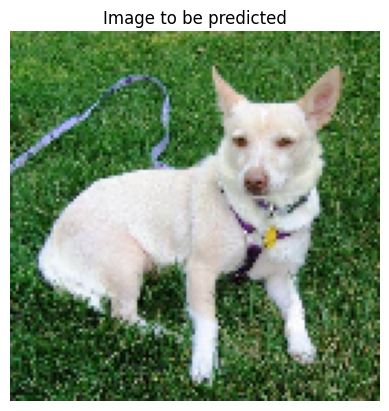

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
This is a dog!


In [21]:
# Load an image you want to predict
img_path = 'dogs/dogi.jpg'
img = image.load_img(img_path, target_size=(128, 128))  # Resize image to match model input shape (128, 128)
img_array = image.img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize the image

# Display the image
plt.imshow(img)  # Display the image using Matplotlib
plt.title("Image to be predicted")
plt.axis('off')  # Hide the axes
plt.show()

# Make a prediction
prediction = model.predict(img_array)

# Interpret the prediction (assuming binary classification)
predicted_class_index = np.argmax(prediction)  # Get the index of the class with the highest probability

if predicted_class_index > 0.5:  
    print("This is a dog!")
else: 
    print("This is a cat!")

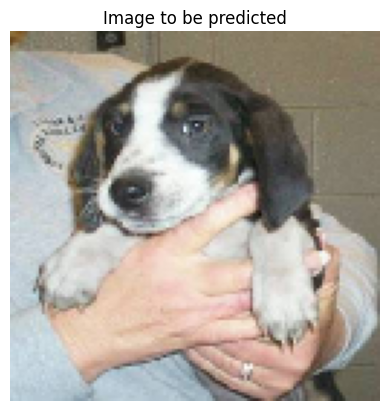

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
This is a dog!


In [31]:
# Load an image you want to predict
img_path = 'dogs/dog.10.jpg'
img = image.load_img(img_path, target_size=(128, 128))  # Resize image to match model input shape (128, 128)
img_array = image.img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize the image

# Display the image
plt.imshow(img)  # Display the image using Matplotlib
plt.title("Image to be predicted")
plt.axis('off')  # Hide the axes
plt.show()

# Make a prediction
prediction = model.predict(img_array)

# Interpret the prediction (assuming binary classification)
predicted_class_index = np.argmax(prediction)  # Get the index of the class with the highest probability

if predicted_class_index > 0.5:  
    print("This is a dog!")
else: 
    print("This is a cat!")

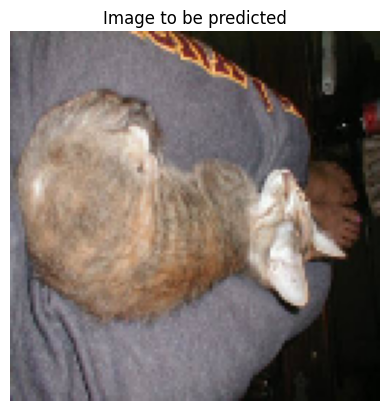

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
This is a cat!


In [36]:
# Load an image you want to predict
img_path = 'cats/cat.24.jpg'
img = image.load_img(img_path, target_size=(128, 128))  # Resize image to match model input shape (128, 128)
img_array = image.img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize the image

# Display the image
plt.imshow(img)  # Display the image using Matplotlib
plt.title("Image to be predicted")
plt.axis('off')  # Hide the axes
plt.show()

# Make a prediction
prediction = model.predict(img_array)

# Interpret the prediction (assuming binary classification)
predicted_class_index = np.argmax(prediction)  # Get the index of the class with the highest probability

if predicted_class_index > 0.5:  
    print("This is a dog!")
else: 
    print("This is a cat!")

